# 1. Initialization

In [90]:
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

d_train = pd.read_csv('Data/train.csv')
d_test = pd.read_csv('Data/test.csv')


# 2. Exploring Data

In [48]:
d_train.head()

# Pclass: A proxy for socio-economic status (SES)
# 1st = Upper  2nd = Middle  3rd = Lower

# Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# SibSp: Number of siblings/spouses aboard. The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored).

# Parch: Number of parents/children aboard. The dataset defines family relations in this way...
# Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.

# Cabin: Cabin number

# Embarked: Port of embarkation. C= Cherbourg, Q= Queenstown, S= Southampton.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# d_train.describe()
# d_train.shape # 891 rows
d_train.info()
# d_train.isnull().sum()  # high null counts for Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null category
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 107.4+ KB


In [149]:
d_train.PassengerId = d_train.PassengerId.astype('category')
d_train.Survived = d_train.Survived.astype('category')
d_train.Pclass = d_train.Pclass.astype('category')
d_train.Sex = d_train.Sex.astype('category')
# d_train.dtypes

# Categorize Age
age_bin = [0, 12, 17, 60, np.inf]  # Age group boundaries
age_bin_lbl = ['child', 'teenager', 'adult', 'elder']  # Age group labels
d_train['AgeGroup'] = pd.cut(d_train.Age, age_bin, labels=age_bin_lbl)

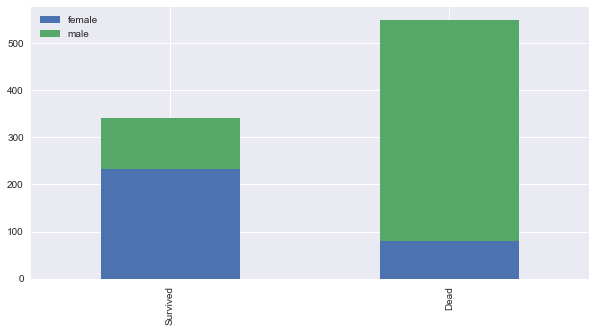

In [157]:
plt.clf()

# d_subset = d_train.iloc[:, [1,2,6,7]]
# sns.pairplot(d_subset, hue='Survived', size=2.5);

# sns.distplot(d_train.Age.dropna())

# g = sns.FacetGrid(d_train, row='Survived', col='Sex')
# g.map(sns.distplot, 'Age')

# sns.jointplot(data=d_train, x='Age', y='Fare', kind='reg')

# Survival heatmap based on age group and sex
# pivt = d_train.pivot_table(index='AgeGroup', columns='Sex', values='Survived', aggfunc=np.sum)
# sns.heatmap(pivt, annot=True, fmt='.1f')

# Correlation heatmap
# sns.heatmap(d_train.corr(), annot=True, fmt='.2f')

def bar_chart(feature):
    survived = d_train[d_train['Survived']==1][feature].value_counts()
    dead = d_train[d_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True,figsize=(10,5))

bar_chart('Sex')  
    
plt.show()
